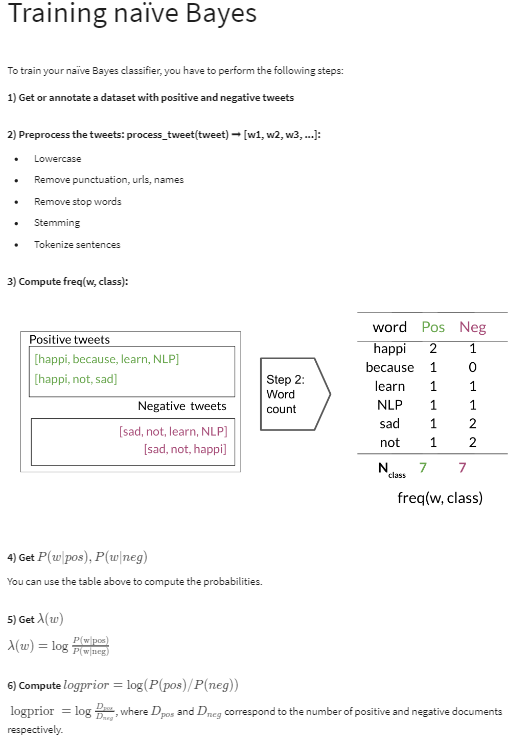

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

import matplotlib.pyplot as plt     # Library for visualization
import numpy as np
import pandas as pd

# import our convenience functions
from nlp_functions.utils_nlp import process_tweet,build_freqs

In [2]:
# downloads sample twitter dataset. uncomment the line below if running on a local machine.
nltk.download('twitter_samples')

# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to C:\Users\MOHAMMED
[nltk_data]     USAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MOHAMMED
[nltk_data]     USAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

test_pos  = all_positive_tweets[4000:]
test_neg  = all_negative_tweets[4000:]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg 

print("Number of tweets: ", len(train_x))
print("Number of tweets: ", len(test_x))

Number of tweets:  8000
Number of tweets:  2000


In [4]:
train_y = np.append(np.ones((len(train_pos))), np.zeros((len(train_neg))))
test_y = np.append(np.ones((len(test_pos))), np.zeros((len(test_neg))))

In [5]:
train_x = pd.DataFrame(train_x)
train_x.rename(columns = {0:'Tweet'}, inplace = True)
train_x['Tweet_arrayed'] = train_x['Tweet'].apply(process_tweet)
train_x

,Tweet,Tweet_arrayed
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,"[followfriday, top, engag, member, commun, wee..."
1,@Lamb2ja Hey James! How odd :/ Please call our...,"[hey, jame, odd, :/, pleas, call, contact, cen..."
2,@DespiteOfficial we had a listen last night :)...,"[listen, last, night, :), bleed, amaz, track, ..."
3,@97sides CONGRATS :),"[congrat, :)]"
4,yeaaaah yippppy!!! my accnt verified rqst has...,"[yeaaah, yipppi, accnt, verifi, rqst, succeed,..."
...,...,...
7995,Amelia didnt stalk my twitter :(,"[amelia, didnt, stalk, twitter, :(]"
7996,"oh, i missed the broadcast. : (","[oh, miss, broadcast]"
7997,i really can't stream on melon i feel useless :-(,"[realli, can't, stream, melon, feel, useless, ..."
7998,I need to stop looking at old soccer pictures :(,"[need, stop, look, old, soccer, pictur, :(]"


In [6]:
test_x = pd.DataFrame(test_x)
test_x.rename(columns = {0:'Tweet'}, inplace = True)
test_x['Tweet_arrayed'] = test_x['Tweet'].apply(process_tweet )

In [7]:
def freq_calculation(tweets,ys):
    result = {}
    unique_words = [] 
    for y, tweet in zip(ys, tweets):
        for word in tweet:
            # define the key, which is the word and label tuple
            pair = (word,y)
            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
            if word not in unique_words:
                unique_words.append(word)
    return result,unique_words

In [8]:
freq,unique_words = freq_calculation(train_x['Tweet_arrayed'],train_y)

In [9]:
unique_words

['followfriday',
 'top',
 'engag',
 'member',
 'commun',
 'week',
 ':)',
 'hey',
 'jame',
 'odd',
 ':/',
 'pleas',
 'call',
 'contact',
 'centr',
 '02392441234',
 'abl',
 'assist',
 'mani',
 'thank',
 'listen',
 'last',
 'night',
 'bleed',
 'amaz',
 'track',
 'scotland',
 'congrat',
 'yeaaah',
 'yipppi',
 'accnt',
 'verifi',
 'rqst',
 'succeed',
 'got',
 'blue',
 'tick',
 'mark',
 'fb',
 'profil',
 '15',
 'day',
 'one',
 'irresist',
 'flipkartfashionfriday',
 'like',
 'keep',
 'love',
 'custom',
 'wait',
 'long',
 'hope',
 'enjoy',
 'happi',
 'friday',
 'lwwf',
 'second',
 'thought',
 '’',
 'enough',
 'time',
 'dd',
 'new',
 'short',
 'enter',
 'system',
 'sheep',
 'must',
 'buy',
 'jgh',
 'go',
 'bayan',
 ':d',
 'bye',
 'act',
 'mischiev',
 'etl',
 'layer',
 'in-hous',
 'wareh',
 'app',
 'katamari',
 'well',
 '…',
 'name',
 'impli',
 ':p',
 'influenc',
 'big',
 '...',
 'juici',
 'selfi',
 'follow',
 'u',
 'back',
 'perfect',
 'alreadi',
 'know',
 "what'",
 'great',
 'opportun',
 'juni

In [51]:
freq[(word, 1.0)]

23

In [10]:
def train_naive_bayes(freqs, train_x, train_y, vocab):
    loglikelihood = {}
    logprior = np.log(np.sum(train_y == 1)/np.sum(train_y == 0))

    # calculate N_pos and N_neg
    N_pos = 0
    N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:
            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]
        # else, the label is negative
        else:
            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]
    V = len(vocab) 
    
    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        try:
            freq_pos = freq[(word, 1.0)]
        except:
            freq_pos = 0
        try:
            freq_neg = freq[(word, 0)]
        except:
            freq_neg = 0
        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos/p_w_neg)
    return logprior, loglikelihood

In [11]:
def naive_bayes_predict(train_x, train_y):
    
    logprior, loglikelihood = train_naive_bayes(freq, train_x, train_y, unique_words)
    score = []
    for tweet in train_x:
        p = 0
        p += logprior
        for word in tweet:
            try:
                p += loglikelihood[word]
            except:
                p += 0 
        score.append(p)
    output = [0 if x < 0 else 1 for x in score]
    return score, output

In [14]:
train_x['Score'],train_x['Output'] = naive_bayes_predict(train_x['Tweet_arrayed'], train_y)
# Train Accuracy
np.sum(train_x['Output']==train_y)/len(train_y)

0.99925

In [15]:
test_x['Score'],test_x['Output'] = naive_bayes_predict(test_x['Tweet_arrayed'], test_y)
#Test Accuracy
np.sum(test_x['Output']==test_y)/len(test_y)

0.995